In [1]:
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd

In [2]:
#Original President Data - Presidents listed per row 
president_data = pd.read_json("../Resources/PresList.json")
president_data = president_data[["number", "president", "party", "took_office", "left_office"]]
president_data.set_index("number")
president_data.head()

,number,president,party,took_office,left_office
0,1,George Washington,No Party,1789-04-30,1797-03-04
1,2,John Adams,Federalist,1797-03-04,1801-03-04
2,3,Thomas Jefferson,Democratic-Republican,1801-03-04,1809-03-04
3,4,James Madison,Democratic-Republican,1809-03-04,1817-03-04
4,5,James Monroe,Democratic-Republican,1817-03-04,1825-03-04


In [3]:
# Turning Took Office & Left Office Columns to Date Time 
president_data.took_office=pd.to_datetime(president_data['took_office'])
president_data.left_office=pd.to_datetime(president_data['left_office'])


C:\Users\griff\Anaconda3\envs\pandas\lib\site-packages\pandas\plotting\_matplotlib\converter.py:102: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


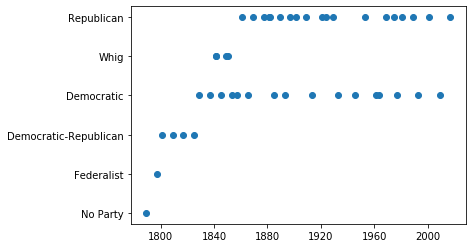

In [4]:
# Party Over Time 
plt.scatter(president_data["took_office"], president_data["party"])

In [5]:
#SNP Data Pull 
snp500_data=pd.read_csv("../Resources/SP500data_csv.csv")
snp500_data.head()
sp500 = snp500_data[["Date", "SP500"]]
sp500.head()

,Date,SP500
0,1871-01-01,4.44
1,1871-02-01,4.50
2,1871-03-01,4.61
3,1871-04-01,4.74
4,1871-05-01,4.86


In [6]:
#Bins are years & labels are president names 
binning = []
labels = []

for index, row in president_data.iterrows():
    binning.append(row['took_office'])
    labels.append(row['president'])

binning.append("2019-08-27")

In [7]:
#Working on sp500 - Create President Columns, and changing dates to date time 
sp500.Date = pd.to_datetime(sp500["Date"])
binning = pd.to_datetime(binning)
bins = pd.cut(sp500["Date"], binning, labels = labels)
sp500["President"] = bins
sp500

C:\Users\griff\Anaconda3\envs\pandas\lib\site-packages\pandas\core\generic.py:5209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\Users\griff\Anaconda3\envs\pandas\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Date,SP500,President
0,1871-01-01,4.44,Ulysses S. Grant
1,1871-02-01,4.50,Ulysses S. Grant
2,1871-03-01,4.61,Ulysses S. Grant
3,1871-04-01,4.74,Ulysses S. Grant
4,1871-05-01,4.86,Ulysses S. Grant
5,1871-06-01,4.82,Ulysses S. Grant
6,1871-07-01,4.73,Ulysses S. Grant
7,1871-08-01,4.79,Ulysses S. Grant
8,1871-09-01,4.84,Ulysses S. Grant
9,1871-10-01,4.59,Ulysses S. Grant


In [8]:
#Just President and party DF
president_party = president_data[["president", "party"]]
president_party2=president_party.rename(columns={"president":"President", "party":"Party"})
president_join=pd.merge(sp500, president_party2, on="President", how="inner")
#president_party2.columns
president_join.head()

,Date,SP500,President,Party
0,1871-01-01,4.44,Ulysses S. Grant,Republican
1,1871-02-01,4.50,Ulysses S. Grant,Republican
2,1871-03-01,4.61,Ulysses S. Grant,Republican
3,1871-04-01,4.74,Ulysses S. Grant,Republican
4,1871-05-01,4.86,Ulysses S. Grant,Republican


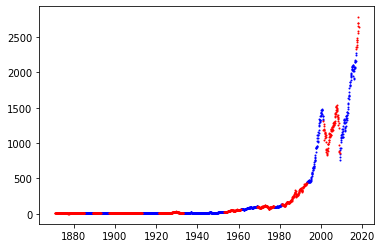

In [9]:
#Democrats and Republicans and respective SP500 prices

democrat = president_join[president_join.Party == "Democratic"] 
republican = president_join[president_join.Party == "Republican"]
#Ulysses = republican.President.loc[["Ulysses S. Grant"]]
#Ulysses

#republican 

plt.scatter(democrat["Date"], democrat["SP500"], s= 1, color="blue")
plt.scatter(republican["Date"], republican ["SP500"], s= 1, color="red")

Text(0, 0.5, 'S&P500')

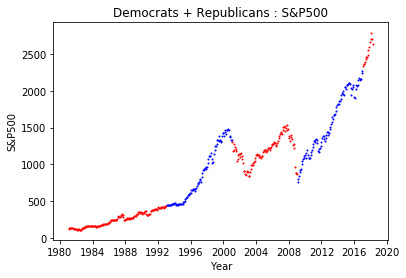

In [10]:
reagan=president_join.loc[president_join['President']=='Ronald Reagan']
bushsr=president_join.loc[president_join['President']=='George H. W. Bush']
clinton=president_join.loc[president_join['President']=='Bill Clinton']
bushjr=president_join.loc[president_join['President']=='George W. Bush']
obama=president_join.loc[president_join['President']=='Barack Obama']
trump=president_join.loc[president_join['President']=='Donald J. Trump']

plt.scatter(reagan["Date"], reagan["SP500"], s= 1, color="red")
plt.scatter(bushsr["Date"], bushsr["SP500"], s= 1, color="red")
plt.scatter(clinton["Date"], clinton["SP500"], s= 1, color="blue")
plt.scatter(bushjr["Date"], bushjr["SP500"], s= 1, color="red")
plt.scatter(obama["Date"], obama["SP500"], s= 1, color="blue")
plt.scatter(trump["Date"], trump["SP500"], s= 1, color="red")

plt.title("Democrats + Republicans : S&P500")
plt.xlabel("Year")
plt.ylabel("S&P500")
#plt.savefig("Figures/fig1.png")
#plt.show()

In [11]:
start = reagan.iat[0,1]
reagan["Percentage"] = 0
for index, row in reagan.iterrows():
    percentage = row["SP500"]/start
    reagan.loc[index,"Percentage"] = percentage*100
start = bushsr.iat[0,1]
bushsr["Percentage"] = 0
for index, row in bushsr.iterrows():
    percentage = row["SP500"]/start
    bushsr.loc[index,"Percentage"] = percentage*100
start = clinton.iat[0,1]
clinton["Percentage"] = 0
for index, row in clinton.iterrows():
    percentage = row["SP500"]/start
    clinton.loc[index,"Percentage"] = percentage*100
start = bushjr.iat[0,1]
bushjr["Percentage"] = 0
for index, row in bushjr.iterrows():
    percentage = row["SP500"]/start
    bushjr.loc[index,"Percentage"] = percentage*100
start = obama.iat[0,1]
obama["Percentage"] = 0
for index, row in obama.iterrows():
    percentage = row["SP500"]/start
    obama.loc[index,"Percentage"] = percentage*100
start = trump.iat[0,1]
trump["Percentage"] = 0
for index, row in trump.iterrows():
    percentage = row["SP500"]/start
    trump.loc[index,"Percentage"] = percentage*100

C:\Users\griff\Anaconda3\envs\pandas\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\griff\Anaconda3\envs\pandas\lib\site-packages\pandas\core\indexing.py:480: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\griff\Anaconda3\envs\pandas\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

In [12]:
reagan.reset_index(drop=True,inplace=True)
reagan.reset_index(drop=False,inplace=True)

bushsr.reset_index(drop=True,inplace=True)
bushsr.reset_index(drop=False,inplace=True)

clinton.reset_index(drop=True,inplace=True)
clinton.reset_index(drop=False,inplace=True)

bushjr.reset_index(drop=True,inplace=True)
bushjr.reset_index(drop=False,inplace=True)

obama.reset_index(drop=True,inplace=True)
obama.reset_index(drop=False,inplace=True)

trump.reset_index(drop=True,inplace=True)
trump.reset_index(drop=False,inplace=True)


In [13]:
trump.head()

,index,Date,SP500,President,Party,Percentage
0,0,2017-02-01,2329.91,Donald J. Trump,Republican,100.000000
1,1,2017-03-01,2366.82,Donald J. Trump,Republican,101.584181
2,2,2017-04-01,2359.31,Donald J. Trump,Republican,101.261851
3,3,2017-05-01,2395.35,Donald J. Trump,Republican,102.808692
4,4,2017-06-01,2433.99,Donald J. Trump,Republican,104.467125


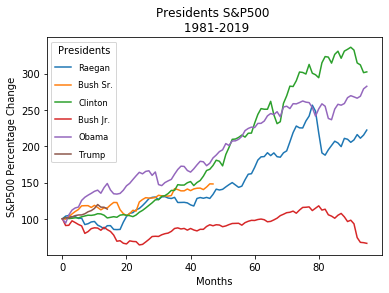

In [14]:
plt.plot(reagan["index"], reagan["Percentage"], label="Raegan")
plt.plot(bushsr["index"], bushsr["Percentage"], label="Bush Sr.")
plt.plot(clinton["index"], clinton["Percentage"], label="Clinton")
plt.plot(bushjr["index"], bushjr["Percentage"], label="Bush Jr.")
plt.plot(obama["index"], obama["Percentage"], label="Obama")
plt.plot(trump["index"], trump["Percentage"], label="Trump")

plt.title(f"Presidents S&P500 \n 1981-2019")
plt.xlabel("Months")
plt.ylabel("S&P500 Percentage Change")
plt.legend(loc="best",fontsize="small",title="Presidents",markerscale=0.5, labelspacing=1)

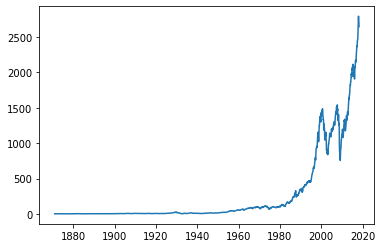

In [15]:
#Plot Date vs SP500
plt.plot(sp500["Date"], sp500["SP500"])

In [16]:
#President_data2 starts at Ulysses 
president_data2=president_data.tail(-17)
president_data2

,number,president,party,took_office,left_office
17,18,Ulysses S. Grant,Republican,1869-03-04,1877-03-04
18,19,Rutherford B. Hayes,Republican,1877-03-04,1881-03-04
19,20,James A. Garfield,Republican,1881-03-04,1881-09-19
20,21,Chester A. Arthur,Republican,1881-09-19,1885-03-04
21,22,Grover Cleveland,Democratic,1885-03-04,1889-03-04
22,23,Benjamin Harrison,Republican,1889-03-04,1893-03-04
23,24,Grover Cleveland(Term 2),Democratic,1893-03-04,1897-03-04
24,25,William McKinley,Republican,1897-03-04,1901-09-14
25,26,Theodore Roosevelt,Republican,1901-09-14,1909-03-04
26,27,William Howard Taft,Republican,1909-03-04,1913-03-04


In [17]:
#sp500_groups=sp500.groupby("President")
#sp500_new=sp500_groups.first()
#sp500_new
#sp500_new.dropna(how='any')
#sp500_groups.reset_index()

In [18]:
#-------END

In [19]:
#plt.plot(sp500_groups., us_gdp_clean["gdp_float"])

In [20]:
#USA GDP
us_gdp=pd.read_csv("../Resources/USGDP.csv")
us_gdp.head()


,DATE,GDP
0,1947-01-01,259.745
1,1948-01-01,280.366
2,1949-01-01,270.627
3,1950-01-01,319.945
4,1951-01-01,356.178


In [21]:
#US GDP Cleaned to numeric & date time
##us_gdp["GDP"] = pd.to_numeric(us_gdp["GDP"])
us_gdp_clean = us_gdp.drop(us_gdp.index[72])
us_gdp_clean['gdp_float'] = us_gdp_clean["GDP"].astype(float)
us_gdp_clean.head()
us_gdp.DATE=pd.to_datetime(us_gdp['DATE'])

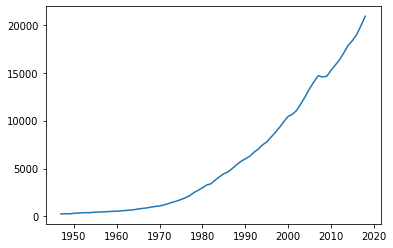

In [22]:
#GDP from 1947 to 2018 in US
us_gdp_clean.DATE=pd.to_datetime(us_gdp_clean['DATE'])
plt.plot(us_gdp_clean["DATE"], us_gdp_clean["gdp_float"])

In [23]:
us_gdp.DATE = pd.to_datetime(us_gdp_clean["DATE"])
bins = pd.cut(us_gdp["DATE"], binning, labels = labels)
us_gdp["President"] = bins
us_gdp.head()

,DATE,GDP,President
0,1947-01-01,259.745,Harry S. Truman
1,1948-01-01,280.366,Harry S. Truman
2,1949-01-01,270.627,Harry S. Truman
3,1950-01-01,319.945,Harry S. Truman
4,1951-01-01,356.178,Harry S. Truman


C:\Users\griff\Anaconda3\envs\pandas\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\griff\Anaconda3\envs\pandas\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\griff\Anaconda3\envs\pandas\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

Text(0, 0.5, 'GDP')

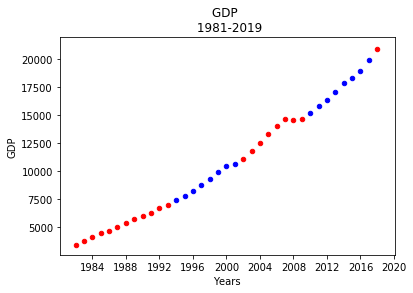

In [24]:
#GDP from 1981-2019

reagan_gdp=us_gdp.loc[us_gdp['President']=='Ronald Reagan']
bushsr_gdp=us_gdp.loc[us_gdp['President']=='George H. W. Bush']
clinton_gdp=us_gdp.loc[us_gdp['President']=='Bill Clinton']
bushjr_gdp=us_gdp.loc[us_gdp['President']=='George W. Bush']
obama_gdp=us_gdp.loc[us_gdp['President']=='Barack Obama']
trump_gdp=us_gdp.loc[us_gdp['President']=='Donald J. Trump']

reagan_gdp["GDP"] = reagan_gdp["GDP"].astype(float)
bushsr_gdp["GDP"] = bushsr_gdp["GDP"].astype(float)
clinton_gdp["GDP"] = clinton_gdp["GDP"].astype(float)
bushjr_gdp["GDP"] = bushjr_gdp["GDP"].astype(float)
obama_gdp["GDP"] = obama_gdp["GDP"].astype(float)
trump_gdp["GDP"] = trump_gdp["GDP"].astype(float)

plt.scatter(reagan_gdp["DATE"], reagan_gdp["GDP"], s= 20, color="red")
plt.scatter(bushsr_gdp["DATE"], bushsr_gdp["GDP"], s= 20, color="red")
plt.scatter(clinton_gdp["DATE"], clinton_gdp["GDP"], s= 20, color="blue")
plt.scatter(bushjr_gdp["DATE"], bushjr_gdp["GDP"], s= 20, color="red")
plt.scatter(obama_gdp["DATE"], obama_gdp["GDP"], s= 20, color="blue")
plt.scatter(trump_gdp["DATE"], trump_gdp["GDP"], s= 20, color="red")

plt.title(f"GDP \n 1981-2019")
plt.xlabel("Years")
plt.ylabel("GDP")

In [25]:
#Change in GDP from 1981-2017

start = reagan_gdp.iat[0,1]
reagan_gdp["Percentage"] = 0
for index, row in reagan_gdp.iterrows():
   percentage = row["GDP"]/start
   reagan_gdp.loc[index,"Percentage"] = percentage
start = bushsr_gdp.iat[0,1]
bushsr_gdp["Percentage"] = 0
for index, row in bushsr_gdp.iterrows():
   percentage = row["GDP"]/start
   bushsr_gdp.loc[index,"Percentage"] = percentage
start = clinton_gdp.iat[0,1]
clinton_gdp["Percentage"] = 0
for index, row in clinton_gdp.iterrows():
   percentage = row["GDP"]/start
   clinton_gdp.loc[index,"Percentage"] = percentage
start = bushjr_gdp.iat[0,1]
bushjr_gdp["Percentage"] = 0
for index, row in bushjr_gdp.iterrows():
   percentage = row["GDP"]/start
   bushjr_gdp.loc[index,"Percentage"] = percentage
start = obama_gdp.iat[0,1]
obama_gdp["Percentage"] = 0
for index, row in obama_gdp.iterrows():
   percentage = row["GDP"]/start
   obama_gdp.loc[index,"Percentage"] = percentage
start = trump_gdp.iat[0,1]
trump_gdp["Percentage"] = 0
for index, row in trump_gdp.iterrows():
   percentage = row["GDP"]/start
   trump_gdp.loc[index,"Percentage"] = percentage


C:\Users\griff\Anaconda3\envs\pandas\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\griff\Anaconda3\envs\pandas\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\griff\Anaconda3\envs\pandas\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

In [26]:
reagan_gdp.reset_index(drop=True,inplace=True)
reagan_gdp.reset_index(drop=False,inplace=True)
bushsr_gdp.reset_index(drop=True,inplace=True)
bushsr_gdp.reset_index(drop=False,inplace=True)
clinton_gdp.reset_index(drop=True,inplace=True)
clinton_gdp.reset_index(drop=False,inplace=True)
bushjr_gdp.reset_index(drop=True,inplace=True)
bushjr_gdp.reset_index(drop=False,inplace=True)
obama_gdp.reset_index(drop=True,inplace=True)
obama_gdp.reset_index(drop=False,inplace=True)
trump_gdp.reset_index(drop=True,inplace=True)
trump_gdp.reset_index(drop=False,inplace=True)

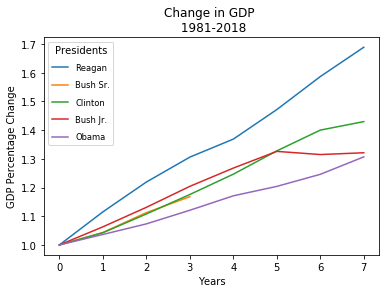

In [27]:
plt.plot(reagan_gdp["index"], reagan_gdp["Percentage"], label="Reagan")
plt.plot(bushsr_gdp["index"], bushsr_gdp["Percentage"], label="Bush Sr.")
plt.plot(clinton_gdp["index"], clinton_gdp["Percentage"], label="Clinton")
plt.plot(bushjr_gdp["index"], bushjr_gdp["Percentage"], label="Bush Jr.")
plt.plot(obama_gdp["index"], obama_gdp["Percentage"], label="Obama")
plt.plot(trump_gdp["index"], trump_gdp["Percentage"])

plt.title(f"Change in GDP \n 1981-2018")
plt.xlabel("Years")
plt.ylabel("GDP Percentage Change")
plt.legend(loc="best",fontsize="small",title="Presidents",markerscale=0.5, labelspacing=1)

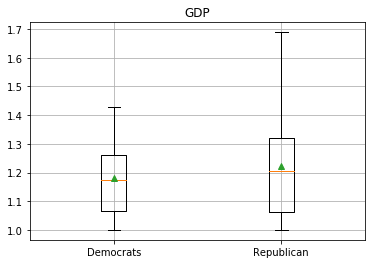

In [28]:
#Box Plot 
gdp_democrat = clinton_gdp.append(obama_gdp)
gdp_republican = reagan_gdp.append(bushsr_gdp).append(bushjr_gdp).append(trump_gdp)

gdp_list = gdp_democrat["Percentage"], gdp_republican["Percentage"]
plt.boxplot(gdp_list, showmeans=True, labels=["Democrats", "Republican"])
plt.title("GDP")
plt.grid()
plt.show()



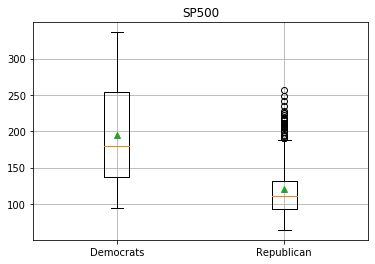

In [29]:
sp500_democrat = clinton.append(obama)
sp500_republican = reagan.append(bushsr).append(bushjr).append(trump)

sp500_list = sp500_democrat["Percentage"], sp500_republican["Percentage"]
plt.boxplot(sp500_list, showmeans=True, labels=["Democrats", "Republican"])
plt.title("SP500")
plt.grid()
plt.show()


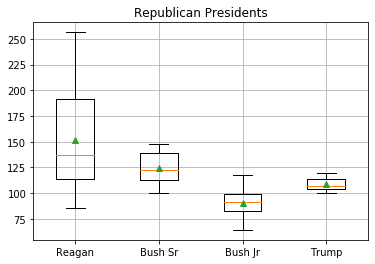

In [30]:
#Republican Presidents 
Republican_pres = [reagan["Percentage"], bushsr["Percentage"], bushjr["Percentage"], trump["Percentage"]]
fig, ax = plt.subplots()
plt.boxplot(Republican_pres, showmeans=True, labels = ["Reagan", "Bush Sr", "Bush Jr", "Trump"])
plt.title("Republican Presidents")
plt.grid()
plt.show()

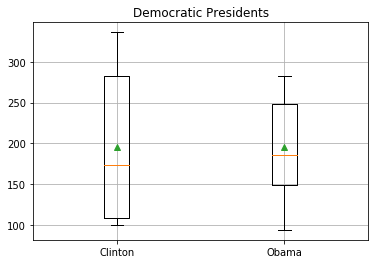

In [31]:
#Democratic Presidents 
Democratic_pres = [clinton["Percentage"], obama["Percentage"]]
fig, ax = plt.subplots()
plt.boxplot(Democratic_pres, showmeans=True, labels = ["Clinton", "Obama"])
plt.title("Democratic Presidents")
plt.grid()
plt.show()

In [32]:
#Standard Deviation sp500
Republican_pres = sp500_republican["Percentage"]
Democratic_pres = sp500_democrat["Percentage"]
(t_stat, p) = stats.ttest_ind(Republican_pres, Democratic_pres, equal_var=False)

rep_mean = np.mean(Republican_pres)
dem_mean = np.mean(Democratic_pres)
print(f"The average % increase in SP500 for Democtratic terms are {format(dem_mean, '.2f')}%")
print(f"The average % increase in SP500 for Republican terms are {format(rep_mean, '.2f')}%")

print("p is {}.".format(p))
if p < 0.05:
    print("The difference in sample means is significant.")
else:
    print("The difference in sample means is not significant.")
    



The average % increase in SP500 for Democtratic terms are 195.39%
The average % increase in SP500 for Republican terms are 120.94%
p is 1.3157367784302424e-31.
The difference in sample means is significant.


In [34]:
#Standard Deviation GDP
gdp_republican_pres = gdp_republican["Percentage"]
gdp_democratic_pres = gdp_democrat["Percentage"]
(t_stat, p) = stats.ttest_ind(gdp_republican_pres, gdp_democratic_pres, equal_var=False)

gdp_rep_mean = np.mean(gdp_republican_pres)
gdp_dem_mean = np.mean(gdp_democratic_pres)
print(f"The average % increase in SP500 for Democtratic terms are {format(gdp_dem_mean, '.2f')}%")
print(f"The average % increase in SP500 for Republican terms are {format(gdp_rep_mean, '.2f')}%")

print("p is {}.".format(p))
if p < 0.05:
    print("The difference in sample means is significant.")
else:
    print("The difference in sample means is not significant.")
    



The average % increase in SP500 for Democtratic terms are 1.18%
The average % increase in SP500 for Republican terms are 1.22%
p is 0.4304229013165647.
The difference in sample means is not significant.


0.4304229013165647